In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Union
from scipy import stats

In [34]:
def generate_distribution(distribution_type: str, size: int = 1000,
                          noise_factor: float = 0.1, outliers_percent: float = 0.05) -> np.ndarray:
    """
    Description:
      Генерирует выборку с заданным распределением, добавляет шум и выбросы.

    Args:
        distribution_type: Тип распределения ('normal' или 'uniform').
        size: Размер выборки.
        noise_factor: Фактор шума.
        outliers_percent: Процент выбросов.

    Returns:
        np.ndarray: Сгенерированная выборка.

    Raises:
        ValueError: Если указан неверный тип распределения.

    Examples:
        >>> data = generate_distribution('normal', 1000)
        >>> len(data)
        1000
    """
    if distribution_type == 'normal':
        data = np.random.normal(loc=0, scale=1, size=size)
    elif distribution_type == 'uniform':
        data = np.random.uniform(low=-1, high=1, size=size)
    else:
        raise ValueError("Неверный тип распределения. Используйте 'normal' или 'uniform'.")

    # Добавляем шум
    noise = np.random.normal(0, noise_factor, size)
    data += noise

    # Добавляем выбросы
    outliers_count = int(size * outliers_percent)
    outliers_indices = np.random.choice(size, outliers_count, replace=False)
    data[outliers_indices] += np.random.uniform(2, 5, outliers_count) * np.sign(data[outliers_indices])

    return data

def calculate_statistics(data: np.ndarray) -> Tuple[float, float, Union[float, str]]:
    """
    Description:
      Рассчитывает основные статистические характеристики выборки.

    Args:
        data: Входная выборка.

    Returns:
        Tuple[float, float, Union[float, str]]: Среднее, медиана и мода выборки.

    Examples:
        >>> data = np.array([1, 2, 2, 3, 4, 5])
        >>> mean, median, mode = calculate_statistics(data)
        >>> print(f"Среднее: {mean}, Медиана: {median}, Мода: {mode}")
        Среднее: 2.8333333333333335, Медиана: 2.5, Мода: 2.0
    """
    mean = np.mean(data)
    median = np.median(data)

    # Вычисление моды с учетом различных версий SciPy
    try:
        mode_result = stats.mode(data)
        if isinstance(mode_result, tuple):  # Для старых версий SciPy
            mode = mode_result[0][0]
        else:  # Для новых версий SciPy
            mode = mode_result.mode[0]
    except:
        # Если мода не может быть определена, возвращаем описательную строку
        unique, counts = np.unique(data, return_counts=True)
        max_count = np.max(counts)
        if np.sum(counts == max_count) > 1:
            mode = "Мультимодальное распределение"
        else:
            mode = unique[np.argmax(counts)]

    return mean, median, mode

def visualize_data(data: np.ndarray, plot_type: str = 'histogram') -> None:
    """
    Description:
      Визуализирует данные с помощью выбранного типа графика.

    Args:
        data: Входная выборка.
        plot_type: Тип графика ('histogram', 'scatter', 'boxplot').

    Raises:
        ValueError: Если указан неверный тип графика.

    Examples:
        >>> data = np.random.normal(0, 1, 1000)
        >>> visualize_data(data, 'histogram')
    """
    plt.figure(figsize=(10, 6))

    if plot_type == 'histogram':
        sns.histplot(data, kde=True)
        plt.title('Гистограмма распределения')
    elif plot_type == 'scatter':
        plt.scatter(range(len(data)), data)
        plt.title('График рассеивания')
    elif plot_type == 'boxplot':
        sns.boxplot(data=data)
        plt.title('Диаграмма размаха ("ящик с усами")')
    else:
        raise ValueError("Неверный тип графика. Используйте 'histogram', 'scatter' или 'boxplot'.")

    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()

def create_dataset_with_anomalies() -> Tuple[np.ndarray, np.ndarray]:
    """
    Description:
      Создает датасет с аномальными значениями.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Датасет и метки аномалий.

    Examples:
        >>> data, anomalies = create_dataset_with_anomalies()
        >>> len(data), sum(anomalies)
        (1000, 50)
    """
    np.random.seed(42)
    normal_data = np.random.normal(loc=0, scale=1, size=950)
    anomalies = np.random.uniform(low=5, high=10, size=50)
    data = np.concatenate([normal_data, anomalies])
    np.random.shuffle(data)

    anomaly_labels = np.zeros(len(data))
    anomaly_labels[np.abs(data) > 3] = 1

    return data, anomaly_labels

def generate_skewed_distribution(size: int = 1000, skewness: float = 0.5) -> np.ndarray:
    """
    Description:
      Генерирует распределение со смещенной медианой относительно среднего.

    Args:
        size: Размер выборки.
        skewness: Степень асимметрии (0 - симметричное, >0 - правосторонняя асимметрия, <0 - левосторонняя).

    Returns:
        np.ndarray: Сгенерированная выборка.

    Examples:
        >>> data = generate_skewed_distribution(1000, 0.5)
        >>> len(data)
        1000
    """
    normal_data = np.random.normal(loc=0, scale=1, size=size)
    skewed_data = np.exp(skewness * normal_data)
    return skewed_data

def analyze_distribution(data: np.ndarray, title: str) -> None:
    """
    Description:
      Анализирует и визуализирует распределение данных.

    Args:
        data: Входная выборка.
        title: Заголовок для графика.

    Examples:
        >>> data = generate_skewed_distribution(1000, 0.5)
        >>> analyze_distribution(data, "Распределение со смещенной медианой")
    """
    mean, median, mode = calculate_statistics(data)

    print(f"\n{title}")
    print(f"Среднее: {mean:.4f}")
    print(f"Медиана: {median:.4f}")
    if isinstance(mode, (int, float)):
        print(f"Мода: {mode:.4f}")
    else:
        print(f"Мода: {mode}")

    data_range = np.max(data) - np.min(data)
    median_mean_diff = abs(median - mean)
    relative_shift = (median_mean_diff / data_range) * 100
    print(f"Относительное смещение медианы от среднего: {relative_shift:.2f}%")

    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.axvline(mean, color='r', linestyle='--', label='Среднее')
    plt.axvline(median, color='g', linestyle='--', label='Медиана')
    plt.title(title)
    plt.legend()
    plt.show()

def analyze_anomalies(data: np.ndarray, anomaly_labels: np.ndarray) -> None:
    """
    Description:
      Анализирует аномалии в датасете и визуализирует результаты.

    Args:
        data: Входной датасет.
        anomaly_labels: Метки аномалий.

    Examples:
        >>> data, anomalies = create_dataset_with_anomalies()
        >>> analyze_anomalies(data, anomalies)
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    sns.boxplot(data=data)
    plt.title('Диаграмма размаха с аномалиями')

    plt.subplot(122)
    plt.scatter(range(len(data)), data, c=anomaly_labels, cmap='viridis')
    plt.title('График рассеивания с отмеченными аномалиями')
    plt.colorbar(label='Аномалия')

    plt.tight_layout()
    plt.show()

    print(f"Количество аномалий: {sum(anomaly_labels)}")
    print(f"Процент аномалий: {sum(anomaly_labels) / len(data) * 100:.2f}%")

def main() -> None:
    """
    Description:
      Основная функция, выполняющая все задания лабораторной работы.
    """
    try:
        # Часть 1
        print("Часть 1: Генерация и анализ распределений")

        # Генерация и анализ нормального и равномерного распределений с шумом и выбросами
        distributions = ['normal', 'uniform']
        for dist in distributions:
            data = generate_distribution(dist, noise_factor=0.1, outliers_percent=0.05)
            analyze_distribution(data, f"Распределение: {dist} (с шумом и выбросами)")
            visualize_data(data, 'histogram')
            visualize_data(data, 'scatter')

        # Генерация и анализ распределения со смещенной медианой
        skewed_data = generate_skewed_distribution(size=1000, skewness=0.5)
        analyze_distribution(skewed_data, "Распределение со смещенной медианой")
        visualize_data(skewed_data, 'histogram')

        # Генерация и анализ распределения с несмещенной медианой
        unskewed_data = generate_distribution('normal', noise_factor=0, outliers_percent=0)
        analyze_distribution(unskewed_data, "Распределение с несмещенной медианой")
        visualize_data(unskewed_data, 'histogram')

        # Часть 2
        print("\nЧасть 2: Анализ аномалий")
        data, anomaly_labels = create_dataset_with_anomalies()
        analyze_anomalies(data, anomaly_labels)

        # Дополнительный анализ аномалий с помощью диаграммы размаха
        visualize_data(data, 'boxplot')

    except Exception as e:
        print(f"Произошла ошибка при выполнении программы: {str(e)}")
        import traceback
        traceback.print_exc()

Часть 1: Генерация и анализ распределений

Распределение: normal (с шумом и выбросами)
Среднее: 0.0349
Медиана: 0.0333
Мода: Мультимодальное распределение
Относительное смещение медианы от среднего: 0.01%


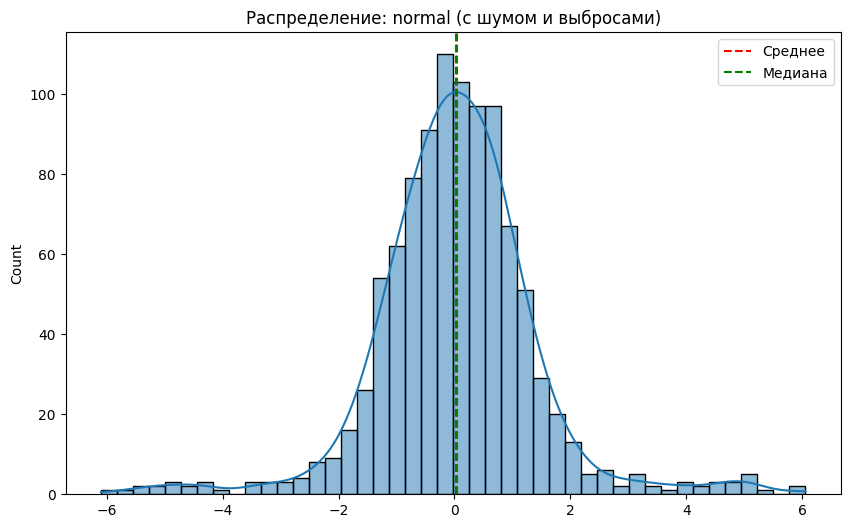

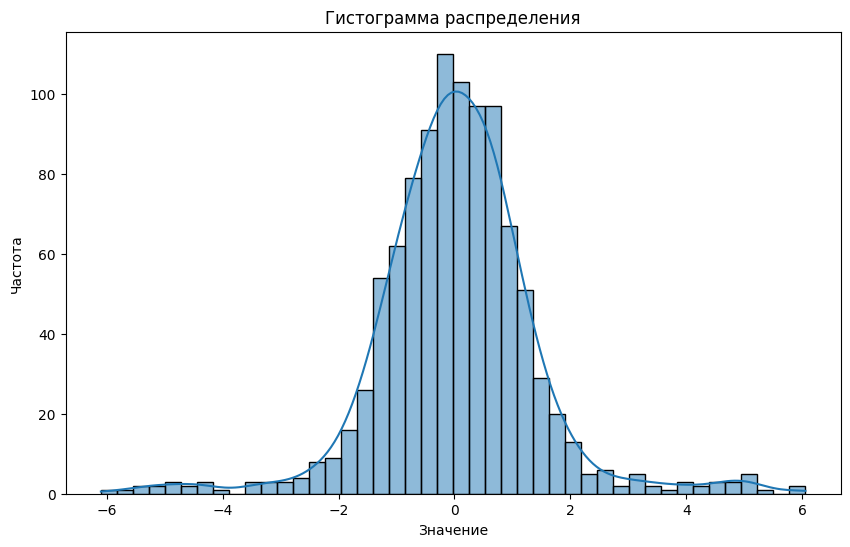

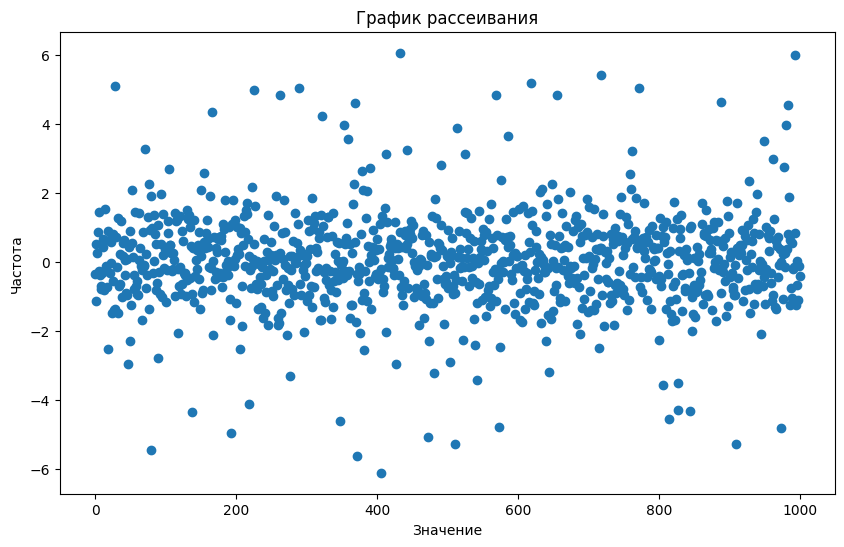


Распределение: uniform (с шумом и выбросами)
Среднее: -0.0073
Медиана: -0.0459
Мода: Мультимодальное распределение
Относительное смещение медианы от среднего: 0.35%


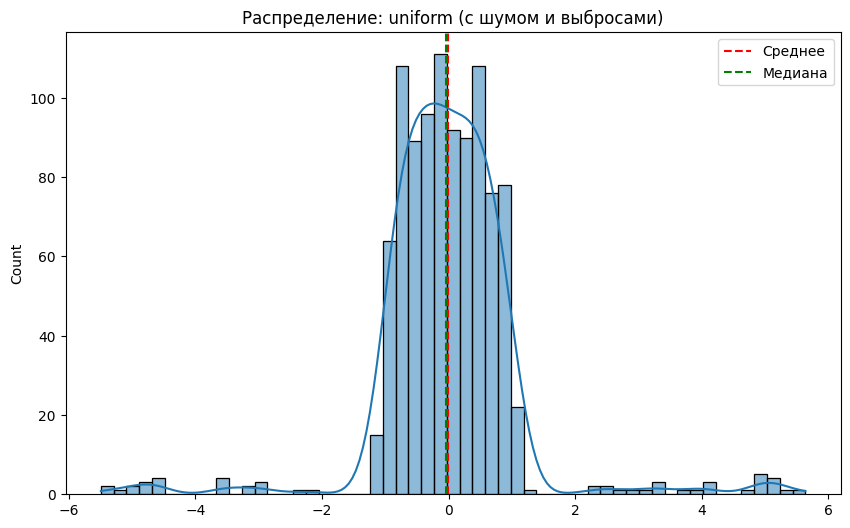

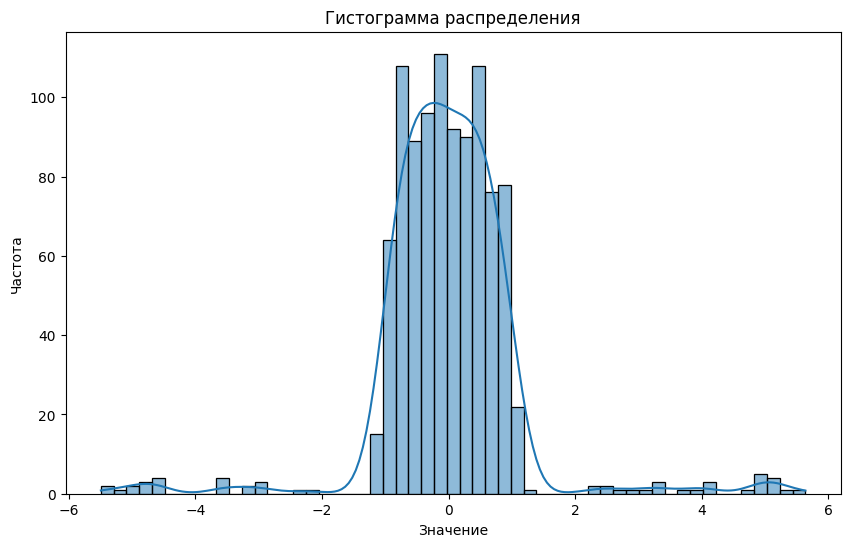

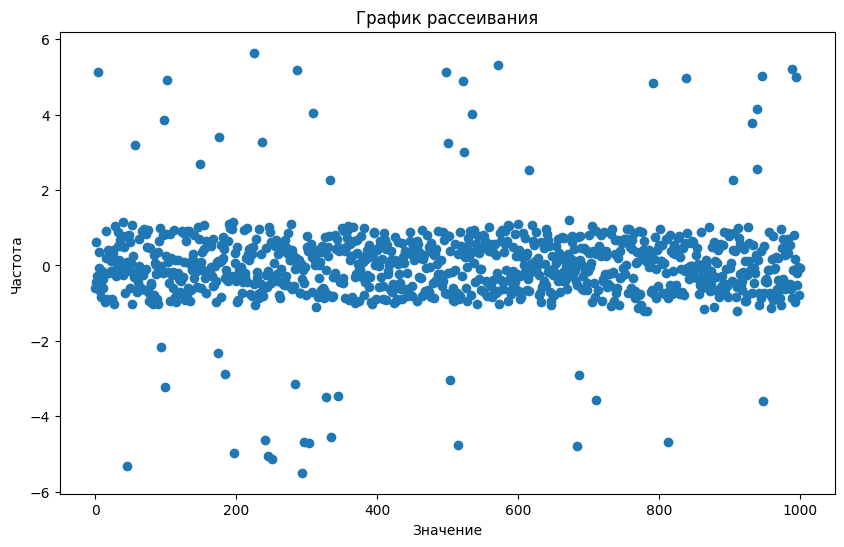


Распределение со смещенной медианой
Среднее: 1.1413
Медиана: 1.0135
Мода: Мультимодальное распределение
Относительное смещение медианы от среднего: 2.25%


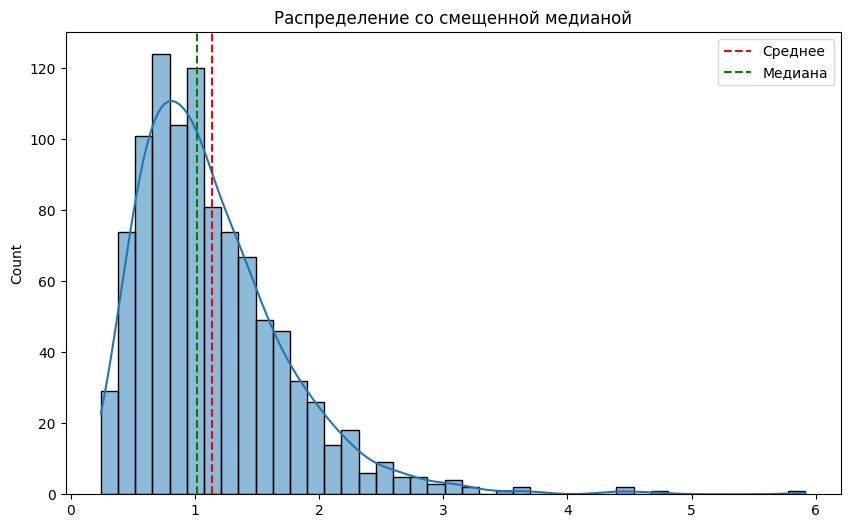

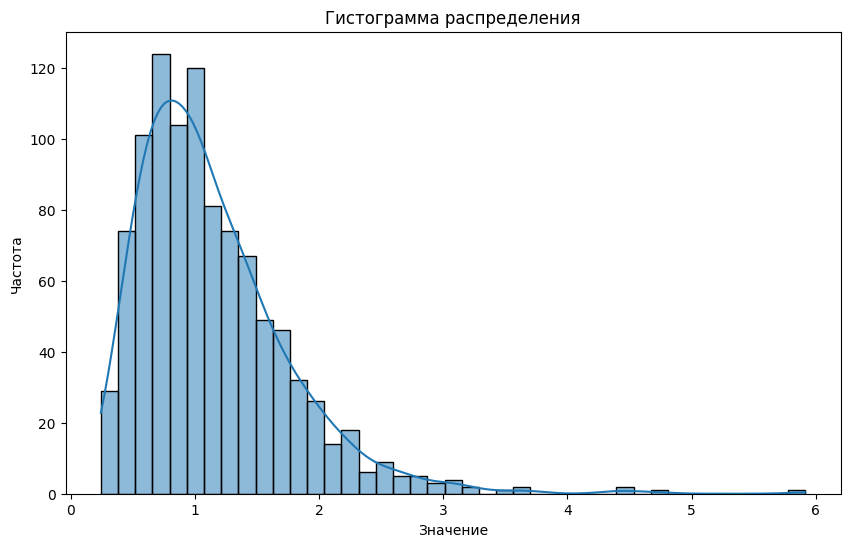


Распределение с несмещенной медианой
Среднее: -0.0209
Медиана: -0.0382
Мода: Мультимодальное распределение
Относительное смещение медианы от среднего: 0.27%


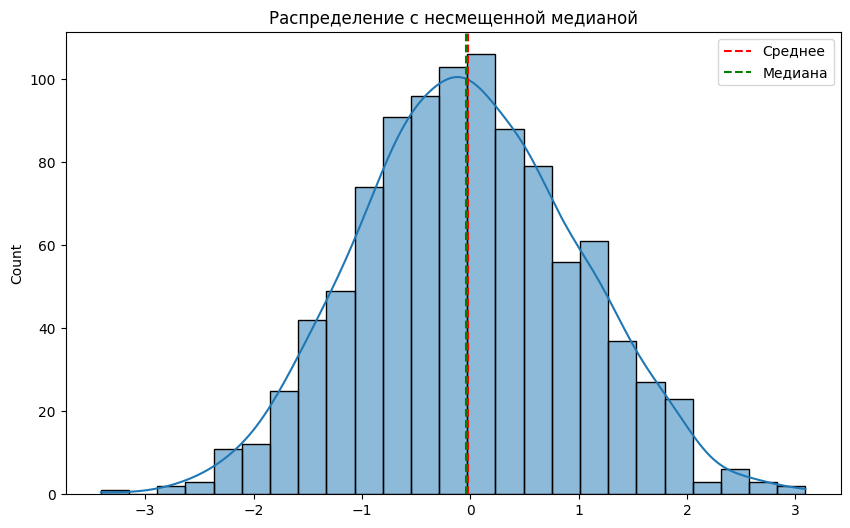

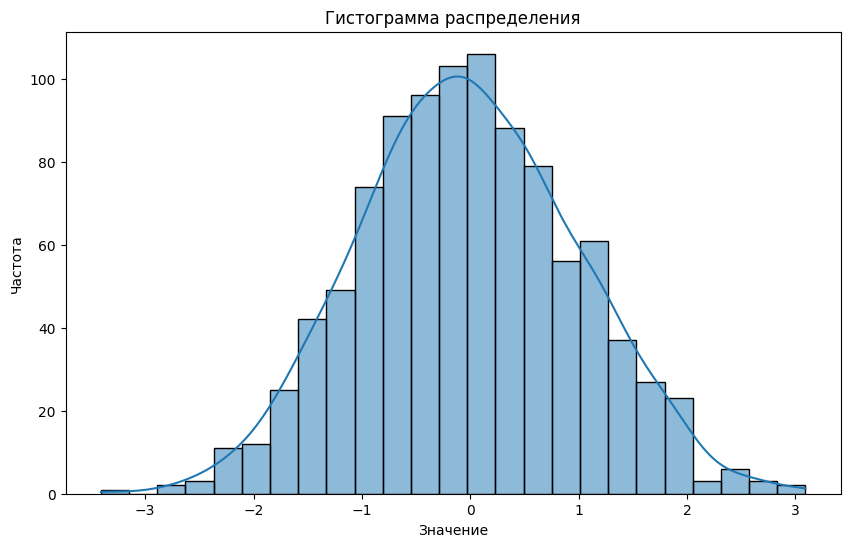


Часть 2: Анализ аномалий


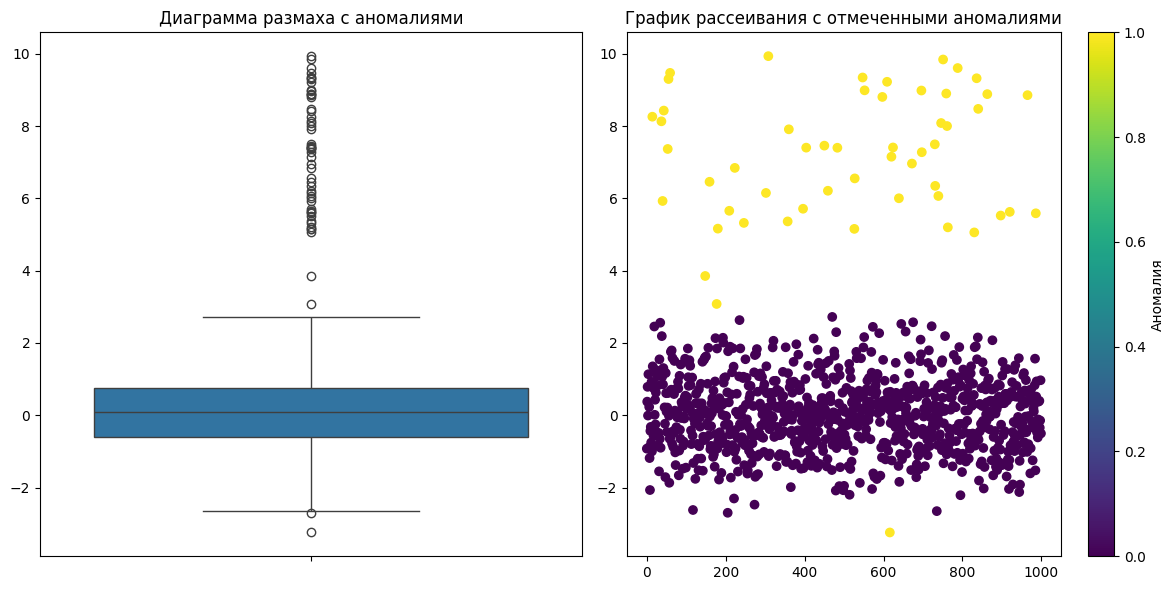

Количество аномалий: 53.0
Процент аномалий: 5.30%


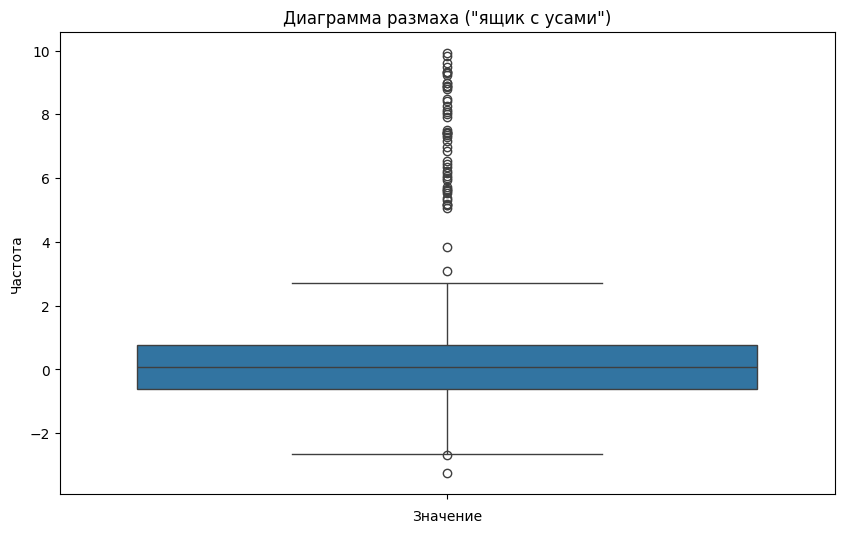

In [35]:
main()